<a href="https://colab.research.google.com/github/dionipadilha/sympy/blob/main/geogebra_cas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GeogebraCAS - Basics

In [1]:
# Symbolic env
from sympy import *
a, b, c, d = symbols('a, b, c, d')
x, y, z, t = symbols('x, y, z, t')
k, m, n = symbols('k, m, n', integer=True)
f, g, h = symbols('f, g, h', cls=Function)
init_printing()

In [2]:
# Configure the plot style
from seaborn import set_style as set_plot_style
set_plot_style({
  'figure.facecolor': '#333',
  'axes.facecolor': '#333',
  'axes.edgecolor': '.75',
  'axes.labelcolor': '.75',
  'axes.grid': True,
  'grid.color':'.75',
  'grid.linestyle':':',
  'xtick.color': '.75',
  'ytick.color': '.75',
  'text.color': '.75'
})

## Defining functions

In [3]:
# Define a new function:
f = Lambda(x, x**3 + 6*x**2 + 6*x - 4)
f(x)

 3      2          
x  + 6⋅x  + 6⋅x - 4

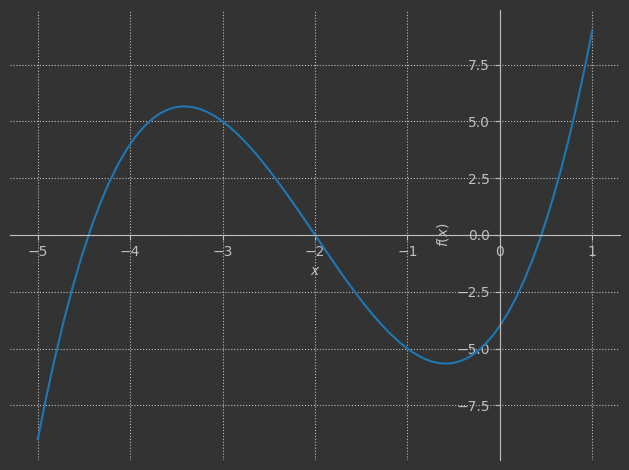

In [4]:
# Plot the graph of f(x):
plot(f(x), (x, -5, 1));

In [5]:
# Calculate the zeros of f(x):
solveset(f(x))

{-2, -2 + √6, -√6 - 2}

In [6]:
# Determine the function values for multiple inputs:
inputs = [-5, 0, 2.15]
[f(x) for x in inputs]

[-9, -4, 46.573375]

In [7]:
# Determine for which arguments x f(x) = 4:
solveset(Eq(f(x), 4))

{-4, -1 + √3, -√3 - 1}

In [8]:
# Switch between  symbolic and numeric output:
solveset(Eq(f(x), 4)).evalf()

{-4.0, -2.73205080756888, 0.732050807568877}

## Function with multiple args

In [9]:
# Enter the function f(a, x) = sqrt(x - a):
f = Lambda((a, x) , sqrt(x - a))
f(a, x)

  ________
╲╱ -a + x 

In [10]:
# Enter the function f(0, x):
f(0, x)

√x

In [11]:
# Compare the function values f(0, x) and f(1, x):
inputs = [0, 1, 2]
[f(a, x) for a in inputs]

⎡      _______    _______⎤
⎣√x, ╲╱ x - 1 , ╲╱ x - 2 ⎦

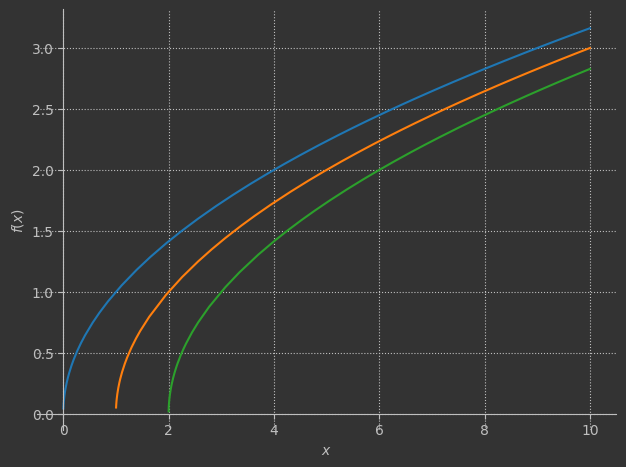

In [12]:
# Draw a family of functions:
graphs = [f(a, x) for a in inputs]
plot(*graphs, (x, -10, 10));

## Terms and variables

In [13]:
# Create a symbolic variables:
a = Symbol('a')
x, y = symbols('x, y')
type(x)

sympy.core.symbol.Symbol

In [14]:
# Enter the symbolic expression:
a + a

2⋅a

In [15]:
# Simplify the simple symbolic expression:
4*x + 3*y - 2*x + y

2⋅x + 4⋅y

In [16]:
# Simplify the complex symbolic expression:
expr = ((1)/(x+y) - 1/x)/y
Eq(expr, expr.simplify())

  1     1            
───── - ─            
x + y   x      -1    
───────── = ─────────
    y       x⋅(x + y)

In [17]:
# factor symbolic expression:
factor((x + y)*(x - y)*(x - y))

       2        
(x - y) ⋅(x + y)

In [18]:
# expand symbolic expression:
expand((x + y)*(x - y)*(x - y))

 3    2        2    3
x  - x ⋅y - x⋅y  + y 

## Solving equations

In [19]:
# Enter the equation:
eq = Eq(3*( x - 2), 5*x + 14)
eq

3⋅x - 6 = 5⋅x + 14

In [20]:
# Solve the equation:
solveset(eq, x)

{-10}

In [21]:
# Enter the quadratic equation:
eq2 = Eq(2*x**2 - x, 15)
solveset(eq2, x)

{-5/2, 3}

In [22]:
# expressions are assumed to be equal to zero:
solveset(12*exp(x)-150, x)

{2⋅n⋅ⅈ⋅π + log(25/2) │ n ∊ ℤ}

In [23]:
# use a specific domain:
solveset(12*exp(x)-150, x, domain=S.Reals)

{log(25/2)}

In [24]:
# solve for x with parameters:
solveset(a*log(b*x+c)-d, x)

⎧ ⎛     d⎞ ⎫
⎪ ⎜     ─⎟ ⎪
⎪ ⎜     a⎟ ⎪
⎨-⎝c - ℯ ⎠ ⎬
⎪──────────⎪
⎪    b     ⎪
⎩          ⎭

## Solving inequalities

In [25]:
# Enter the inequality:
inequality = 3*x + 2 > -x + 8

In [26]:
# For general cases use reduce_inequalities():
reduce_inequalities(inequality, x)

3/2 < x ∧ x < ∞

In [27]:
# Use simplify to reduce the inequality:
simplify(inequality)

x > 3/2

## Solving systems of equations

In [28]:
# Solve asSystem of linear equations:
eq1 = x + 2*y + 3*z - 60
eq2 = 2*x - 3*y + 5*z - 68
eq3 = -x + y - z + 13
linear_eq = [eq1, eq2, eq3]
solutions = solve(linear_eq, [x, y, z], dict=True)
solutions

⎡⎧   27     57     173⎫⎤
⎢⎨x: ──, y: ──, z: ───⎬⎥
⎣⎩   11     11      11⎭⎦

In [29]:
# Solve asSystem of nonlinear equations:
eq1 = x**2 + y - 2*z
eq2 = y + 4*z
nonlinear_eq = [eq1, eq2]
solutions = solve(nonlinear_eq, [x, y, z], dict=True)
solutions

[{x: -√6⋅√z, y: -4⋅z}, {x: √6⋅√z, y: -4⋅z}]

In [30]:
# Use a solution given as a dictionary:
solutions[0][x]

-√6⋅√z

## Limits

In [31]:
# Compute symbolic limits:
f = sin(x)/x
a = 0
L = Limit(f, x, a)
Eq(L, L.doit())

     ⎛sin(x)⎞    
 lim ⎜──────⎟ = 1
x─→0⁺⎝  x   ⎠    

In [32]:
# Compute symbolic limits at the right-sided:
f = 1/x
a = 0
L = Limit(f, x, a, '+')
Eq(L, L.doit())

     1    
 lim ─ = ∞
x─→0⁺x    

In [33]:
# Compute symbolic limits at the left-sided:
f = 1/x
a = 0
L = Limit(f, x, a, '-')
Eq(L, L.doit())

     1     
 lim ─ = -∞
x─→0⁻x     

In [34]:
# Compute symbolic limit at the infinity:
f = (x**3 + 2*x - 15)/(3*x**3 + 10*x**2 - x + 6)
a = oo
L = Limit(f, x, a)
Eq(L, L.doit())

    ⎛    3               ⎞      
    ⎜   x  + 2⋅x - 15    ⎟      
lim ⎜────────────────────⎟ = 1/3
x─→∞⎜   3       2        ⎟      
    ⎝3⋅x  + 10⋅x  - x + 6⎠      

## Derivatives

In [35]:
# Calculate derivatives of a function:
f = 2*x**3 - 7*x**2 + 5*x - 1
f_ = f.diff(x)
f_

   2           
6⋅x  - 14⋅x + 5

In [36]:
# Calculate derivatives of a function:
f = 2*x**3 - 7*x**2 + 5*x - 1
f_ = Derivative(f, x)
Eq(f_, f_.doit())

d ⎛   3      2          ⎞      2           
──⎝2⋅x  - 7⋅x  + 5⋅x - 1⎠ = 6⋅x  - 14⋅x + 5
dx                                         

In [37]:
# Calculate the slope of f(x) in x = a:
f = 2*x**3 - 7*x**2 + 5*x - 1
f_ = Lambda(x, diff(f, x))
f_(0)

5

In [38]:
# Compute the second derivative of f(x):
f = 2*x**3 - 7*x**2 + 5*x - 1
f__ = Lambda(x, diff(f, x, 2))
f__(x)

12⋅x - 14

## Integrals

In [39]:
# Compute an integral of f(x):
f = x**2 + 2*x - 3
F = f.integrate(x)
F

 3           
x     2      
── + x  - 3⋅x
3            

In [40]:
# Compute an integral of f(x):
f = x**2
F = Integral(f, x)
Eq(F, F.doit())

⌠          3
⎮  2      x 
⎮ x  dx = ──
⌡         3 

In [41]:
# Compute an integral of f(x) with constant:
f = x**2
F = Integral(f, x)
Eq(F, F.doit() + UnevaluatedExpr(c))

⌠          3    
⎮  2      x     
⎮ x  dx = ── + c
⌡         3     

In [42]:
# Compute an integral of f(x) with limits:
f = x**2
F = Integral(f, (x, 0, 3))
Eq(F, F.doit())

3          
⌠          
⎮  2       
⎮ x  dx = 9
⌡          
0          

In [43]:
# Compute an integral of f(x) with symbolic limits:
a, b = symbols('a, b')
f = x**2
F = Integral(f, (x, a, b))
Eq(F, F.doit())

b                  
⌠            3    3
⎮  2        a    b 
⎮ x  dx = - ── + ──
⌡           3    3 
a                  

In [44]:
# Compute multiple integrations:
f = (x ** 2 + 2*y)
F = Integral(f, (x, 1, 2), (y, 3, 4))
Eq(F, F.doit())

4 2                        
⌠ ⌠                        
⎮ ⎮ ⎛ 2      ⎞             
⎮ ⎮ ⎝x  + 2⋅y⎠ dx dy = 28/3
⌡ ⌡                        
3 1                        

In [45]:
# Compute multiple integrations:
f = (x ** 2 + 2*y)
F = Integral(f, (y, 1, x-2), (x, 1, 3))
Eq(F, F.doit())

3 x - 2                         
⌠   ⌠                           
⎮   ⎮   ⎛ 2      ⎞              
⎮   ⎮   ⎝x  + 2⋅y⎠ dy dx = -22/3
⌡   ⌡                           
1   1                           

In [46]:
# Compute improper integrals:
integrate(1/sqrt(x), (x, 0, 1))

2

In [47]:
# Compute divergente improper integrals:
integrate(exp(x), (x, 1, oo))

∞

In [48]:
# Compute line integrals:
C = Curve([E**t + 1, E**t - 1], (t, 0, ln(2)))
line_integrate(x + y, C, [x, y])

3⋅√2